In [1]:
# Ignore all code warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Olympics

This is a historical dataset on the modern Olympic Games, from Athens 1896 to Rio 2016. Each row consists of an individual athlete competing in an Olympic event and which medal was won (if any).

Not sure where to begin? Scroll to the bottom to find challenges!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
olympic=pd.read_csv("Data/dataset.csv")

In [3]:
olympic.to_csv("dataset.csv")

## Data Dictionary

|Column   |Explanation                   |
| ------- | ---------------------------- |
|id       |Unique number for each athlete |
|name     |Athlete's name                 |
|sex      |M or F                         |
|age      |Age of the athlete                        |
|height   |In centimeters                 |
|weight   |In kilograms                   |
|team     |Team name                      |
|noc      |National Olympic Committee 3   |
|games    |Year and season                |
|year     |Integer                        |
|season   |Summer or Winter               |
|city     |Host city                      |
|sport    |Sport                          |
|event    |Event                          |
|medal    |Gold, Silver, Bronze, or NA    |

[Source](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) and [license](https://creativecommons.org/publicdomain/zero/1.0/) of the dataset.
The dataset is a consolidated version of data from www.sports-reference.com. 

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: In which year and city did the Netherlands win the highest number of medals in their history?
- 📊 **Visualize**: Create a plot visualizing the relationship between the number of athletes countries send to an event and the number of medals they receive.
- 🔎 **Analyze**: In which sports does the height of an athlete increase their chances of earning a medal?
 
**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working as a data analyst for an international judo club. The owner of the club is looking for new ways to leverage data for competition. One idea they have had is to use past competition data to estimate the threat of future opponents. They have provided you with a dataset of past Olympic data and want to know whether you can use information such as the height, weight, age, and national origin of a judo competitor to estimate the probability that they will earn a medal.

You will need to prepare a report that is accessible to a broad audience. It should outline your steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

In [104]:
olympic.head(5)

,Unnamed: 0,Unnamed: 0.1,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [105]:
print(olympic.head(5).to_markdown())

|    |   Unnamed: 0 |   Unnamed: 0.1 |   id | name                     | sex   |   age |   height |   weight | team           | noc   | games       |   year | season   | city      | sport         | event                            | medal   |
|---:|-------------:|---------------:|-----:|:-------------------------|:------|------:|---------:|---------:|:---------------|:------|:------------|-------:|:---------|:----------|:--------------|:---------------------------------|:--------|
|  0 |            0 |              0 |    1 | A Dijiang                | M     |    24 |      180 |       80 | China          | CHN   | 1992 Summer |   1992 | Summer   | Barcelona | Basketball    | Basketball Men's Basketball      | nan     |
|  1 |            1 |              1 |    2 | A Lamusi                 | M     |    23 |      170 |       60 | China          | CHN   | 2012 Summer |   2012 | Summer   | London    | Judo          | Judo Men's Extra-Lightweight     | nan     |
|  2 |            2 |       

In [106]:
olympic.shape
#(line,colone)

(271116, 17)

In [107]:
olympic.describe(include='all')


,Unnamed: 0,Unnamed: 0.1,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
count,271116.000000,271116.000000,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,NaN,NaN,134731,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,NaN,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,NaN,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,135557.500000,135557.500000,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,78264.592128,78264.592128,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,67778.750000,67778.750000,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,135557.500000,135557.500000,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,203336.250000,203336.250000,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [108]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    271116 non-null  int64  
 1   Unnamed: 0.1  271116 non-null  int64  
 2   id            271116 non-null  int64  
 3   name          271116 non-null  object 
 4   sex           271116 non-null  object 
 5   age           261642 non-null  float64
 6   height        210945 non-null  float64
 7   weight        208241 non-null  float64
 8   team          271116 non-null  object 
 9   noc           271116 non-null  object 
 10  games         271116 non-null  object 
 11  year          271116 non-null  int64  
 12  season        271116 non-null  object 
 13  city          271116 non-null  object 
 14  sport         271116 non-null  object 
 15  event         271116 non-null  object 
 16  medal         39783 non-null   object 
dtypes: float64(3), int64(4), object(10)
memory usage

## selectionner que les joueurs de Netherlands

In [4]:
Neth_olympic = olympic[olympic.team=="Netherlands"]
Neth_olympic.head(10)

,Unnamed: 0,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
26,26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
88,88,27,Johan Aantjes,M,26.0,NaN,NaN,Netherlands,NED,1984 Summer,1984,Summer,Los Angeles,Water Polo,Water Polo Men's Water Polo,NaN
91,91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze


#### Gestion des données manquantes
* Il manque certaines informations. 
    * déterminer les cases vides
    * remplir les cases par des valeurs aliatoires (tant que on ne pas besoin de donnée de pods et taille)


### déterminer les cases vides

In [5]:
Neth_olympic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 4 to 271051
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5718 non-null   int64  
 1   id          5718 non-null   int64  
 2   name        5718 non-null   object 
 3   sex         5718 non-null   object 
 4   age         5713 non-null   float64
 5   height      3733 non-null   float64
 6   weight      3695 non-null   float64
 7   team        5718 non-null   object 
 8   noc         5718 non-null   object 
 9   games       5718 non-null   object 
 10  year        5718 non-null   int64  
 11  season      5718 non-null   object 
 12  city        5718 non-null   object 
 13  sport       5718 non-null   object 
 14  event       5718 non-null   object 
 15  medal       988 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 759.4+ KB


### Déterminier le manque de donnée pour les "age","weight" et "height"

In [6]:
Neth_olympic[["age","weight","height"]].isna().sum()

age          5
weight    2023
height    1985
dtype: int64

### Manipuler les données manquantes en remplissant la min

In [7]:
Neth_olympic[["age","weight","height"]].describe()

,age,weight,height
count,5713.000000,3695.000000,3733.000000
mean,26.555400,73.512855,179.452987
std,7.610561,13.116757,9.970414
min,13.000000,38.000000,147.000000
25%,22.000000,64.000000,172.000000
50%,25.000000,73.000000,180.000000
75%,29.000000,82.000000,186.000000
max,74.000000,135.000000,213.000000


In [8]:
# replace any Nan with the min
for col in ["age","weight","height"]:
    min_col = Neth_olympic[col].min() 
    Neth_olympic[col] = Neth_olympic[col].fillna(min_col) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20388\2154259336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Neth_olympic[col] = Neth_olympic[col].fillna(min_col)


In [9]:
Neth_olympic[["age","weight","height"]].isna().sum()

age       0
weight    0
height    0
dtype: int64

In [114]:
Neth_olympic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 4 to 271051
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5718 non-null   int64  
 1   Unnamed: 0.1  5718 non-null   int64  
 2   id            5718 non-null   int64  
 3   name          5718 non-null   object 
 4   sex           5718 non-null   object 
 5   age           5718 non-null   float64
 6   height        5718 non-null   float64
 7   weight        5718 non-null   float64
 8   team          5718 non-null   object 
 9   noc           5718 non-null   object 
 10  games         5718 non-null   object 
 11  year          5718 non-null   int64  
 12  season        5718 non-null   object 
 13  city          5718 non-null   object 
 14  sport         5718 non-null   object 
 15  event         5718 non-null   object 
 16  medal         988 non-null    object 
dtypes: float64(3), int64(4), object(10)
memory usage: 804.1+ KB


In [10]:
neth_olympic1 = Neth_olympic.dropna()
neth_olympic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 91 to 271049
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  988 non-null    int64  
 1   id          988 non-null    int64  
 2   name        988 non-null    object 
 3   sex         988 non-null    object 
 4   age         988 non-null    float64
 5   height      988 non-null    float64
 6   weight      988 non-null    float64
 7   team        988 non-null    object 
 8   noc         988 non-null    object 
 9   games       988 non-null    object 
 10  year        988 non-null    int64  
 11  season      988 non-null    object 
 12  city        988 non-null    object 
 13  sport       988 non-null    object 
 14  event       988 non-null    object 
 15  medal       988 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 131.2+ KB


In [11]:
# remove "Unnamed: 0" and "Unnamed: 0.1"
if "Unnamed: 0" in neth_olympic1:
    neth_olympic1 = neth_olympic1.iloc[:,2:]
neth_olympic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 91 to 271049
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    988 non-null    object 
 1   sex     988 non-null    object 
 2   age     988 non-null    float64
 3   height  988 non-null    float64
 4   weight  988 non-null    float64
 5   team    988 non-null    object 
 6   noc     988 non-null    object 
 7   games   988 non-null    object 
 8   year    988 non-null    int64  
 9   season  988 non-null    object 
 10  city    988 non-null    object 
 11  sport   988 non-null    object 
 12  event   988 non-null    object 
 13  medal   988 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 115.8+ KB


* Maintenant on va créer une nouvelle colonne boolenne qui transforme la resultat de medal si l'équipe avoir une medal on avoir true pour facilité le calcul de la somme de medal

In [12]:
neth_olympic1['gold'] = neth_olympic1['medal'] == 'Gold'
neth_olympic1['silver'] = neth_olympic1['medal'] == 'Silver'
neth_olympic1['bronze'] = neth_olympic1['medal'] == 'Bronze'

In [13]:
neth_olympic1.head(10)

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,gold,silver,bronze
91,Willemien Aardenburg,F,22.0,147.0,38.0,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,False,False,True
92,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,False,True,False
1227,Chantal Achterberg,F,27.0,172.0,72.0,Netherlands,NED,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxed Eights,Bronze,False,False,True
1228,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver,False,True,False
2099,Marilyn Agliotti,F,29.0,172.0,58.0,Netherlands,NED,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Gold,True,False,False
2100,Marilyn Agliotti,F,33.0,172.0,58.0,Netherlands,NED,2012 Summer,2012,Summer,London,Hockey,Hockey Women's Hockey,Gold,True,False,False
2173,"Estella ""Stella"" Agsteribbe (-Blits)",F,19.0,147.0,38.0,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Gold,True,False,False
6541,"Julius Theodoor ""Jules"" Ancion",M,27.0,147.0,38.0,Netherlands,NED,1952 Summer,1952,Summer,Helsinki,Hockey,Hockey Men's Hockey,Silver,False,True,False
7962,Jan Geert Ankerman,M,22.0,147.0,38.0,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Silver,False,True,False
8596,Tessa Appeldoorn,F,27.0,177.0,71.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Women's Coxed Eights,Silver,False,True,False


In [14]:
nb_gold_medal= neth_olympic1.groupby(['year'])['gold'].sum()
nb_gold_medal.head(5)

year
1900    0
1906    0
1908    0
1912    0
1920    9
Name: gold, dtype: int64

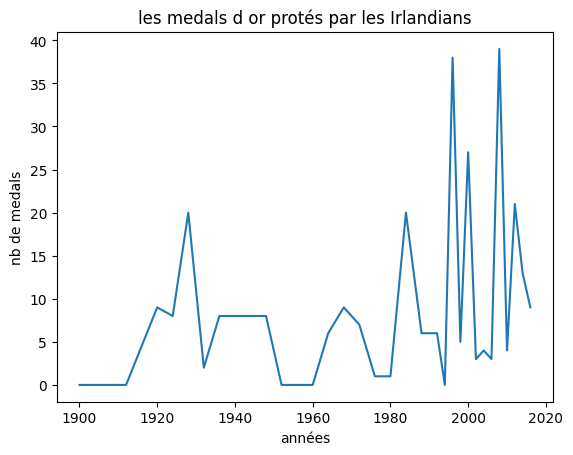

In [15]:
nb_gold_medal.plot()
plt.xlabel('années')
plt.ylabel('nb de medals')
plt.title('les medals d or protés par les Irlandians');

In [16]:
nb_silver_medal= neth_olympic1.groupby(['year'])['silver'].sum()
nb_silver_medal.head(5)

year
1900    0
1906    1
1908    0
1912    0
1920    8
Name: silver, dtype: int64

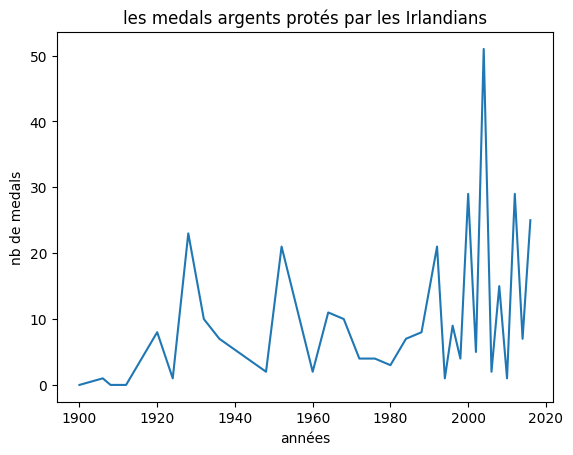

In [17]:
nb_silver_medal.plot()

plt.xlabel('années')
plt.ylabel('nb de medals')
plt.title('les medals argents protés par les Irlandians');

In [18]:
nb_bronze_medal= neth_olympic1.groupby(['year'])['bronze'].sum()
nb_bronze_medal.head(5)

year
1900     6
1906     5
1908    12
1912    26
1920    25
Name: bronze, dtype: int64

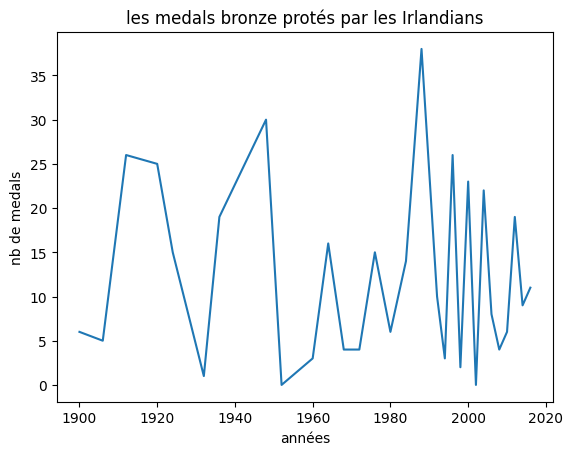

In [19]:
nb_bronze_medal.plot()

plt.xlabel('années')
plt.ylabel('nb de medals')
plt.title('les medals bronze protés par les Irlandians');

* Construire une nouvelle dataset 

In [20]:
# build the general dataset Medal/Year
new = { 
   "bronze_medal":nb_bronze_medal,
   "silver_medal":nb_silver_medal ,
   "gold_medal":nb_gold_medal,
   "total_medal":nb_gold_medal+nb_silver_medal+nb_bronze_medal
}

new_df_1 = pd.DataFrame(new).reset_index()

new_df_1.head(5)

,year,bronze_medal,silver_medal,gold_medal,total_medal
0,1900,6,0,0,6
1,1906,5,1,0,6
2,1908,12,0,0,12
3,1912,26,0,0,26
4,1920,25,8,9,42


In [21]:
# build the specified dataset Year/City/Medal
new_df_2 = neth_olympic1.groupby(['year','city'])['bronze','silver','gold'].sum().reset_index() # group by city and year 
new_df_2['total_medal'] = new_df_2['gold'] + new_df_2['silver'] + new_df_2['bronze'] # Calculate the total of medals
new_df_2 = new_df_2.rename({'bronze': 'bronze_medal', 'silver': 'silver_medal', 'gold': 'gold_medal'}, axis='columns') # rename the columns 
new_df_2.head(5)

,year,city,bronze_medal,silver_medal,gold_medal,total_medal
0,1900,Paris,6,0,0,6
1,1906,Athina,5,1,0,6
2,1908,London,12,0,0,12
3,1912,Stockholm,26,0,0,26
4,1920,Antwerpen,25,8,9,42


* Le maximum de medals qui etaient prise par holand

In [22]:
# First method (return the city that has the max number of total medals)
last=new_df_2.loc[new_df_2['total_medal'] == max(new_df_2['total_medal'])]
last

,year,city,bronze_medal,silver_medal,gold_medal,total_medal
32,2000,Sydney,23,29,27,79


In [23]:
# Second method 
new_df_2.iloc[new_df_2['total_medal'].idxmax()] 

year              2000
city            Sydney
bronze_medal        23
silver_medal        29
gold_medal          27
total_medal         79
Name: 32, dtype: object

In [24]:
last.columns

Index(['year', 'city', 'bronze_medal', 'silver_medal', 'gold_medal',
       'total_medal'],
      dtype='object')

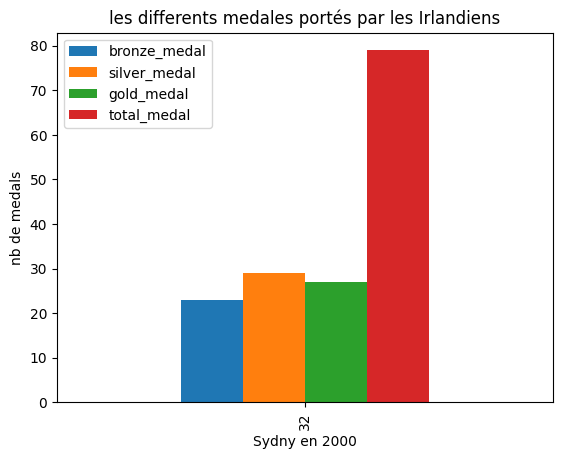

In [25]:
last[['bronze_medal', 'silver_medal', 'gold_medal',
       'total_medal']].plot(kind='bar')
plt.xlabel('Sydny en 2000')
plt.ylabel('nb de medals')
plt.title('les differents medales portés par les Irlandiens');

In [26]:
# return the city that has the max number of gold medals
new_df_2.loc[new_df_2['gold_medal'] == max(new_df_2['gold_medal'])]

,year,city,bronze_medal,silver_medal,gold_medal,total_medal
36,2008,Beijing,4,15,39,58


In [27]:
# Build the dataset that group the height and weight per average value / sport 
weight_height_grp = (neth_olympic1.groupby(['sport'])["weight","height"]).mean()
weight_height_grp = weight_height_grp.reset_index()
weight_height_grp

,sport,weight,height
0,Archery,41.777778,151.333333
1,Art Competitions,38.000000,147.000000
2,Athletics,59.227273,167.545455
3,Badminton,67.000000,163.000000
4,Boxing,73.428571,181.142857
5,Canoeing,55.166667,160.083333
6,Cycling,59.611940,167.940299
7,Equestrianism,56.679245,165.245283
8,Fencing,38.000000,147.000000
9,Figure Skating,55.000000,167.666667


In [28]:
medals_grp = neth_olympic1.groupby(['sport'])['bronze','silver','gold'].sum().reset_index() # group medals and sport
medals_grp['total_medal'] = medals_grp['gold'] + medals_grp['silver'] + medals_grp['bronze'] # Calculate the total of medals
medals_grp

,sport,bronze,silver,gold,total_medal
0,Archery,1,0,8,9
1,Art Competitions,4,1,2,7
2,Athletics,9,4,9,22
3,Badminton,0,1,0,1
4,Boxing,4,2,1,7
5,Canoeing,8,4,0,12
6,Cycling,17,25,25,67
7,Equestrianism,7,28,18,53
8,Fencing,30,1,0,31
9,Figure Skating,0,2,1,3


In [29]:
merged_df = pd.merge(weight_height_grp, medals_grp , how='inner', on = 'sport')
merged_df

,sport,weight,height,bronze,silver,gold,total_medal
0,Archery,41.777778,151.333333,1,0,8,9
1,Art Competitions,38.000000,147.000000,4,1,2,7
2,Athletics,59.227273,167.545455,9,4,9,22
3,Badminton,67.000000,163.000000,0,1,0,1
4,Boxing,73.428571,181.142857,4,2,1,7
5,Canoeing,55.166667,160.083333,8,4,0,12
6,Cycling,59.611940,167.940299,17,25,25,67
7,Equestrianism,56.679245,165.245283,7,28,18,53
8,Fencing,38.000000,147.000000,30,1,0,31
9,Figure Skating,55.000000,167.666667,0,2,1,3


In [30]:
# sort the dataset per height and number of medals
merged_df.sort_values(['total_medal','height'], ascending = [False, False])

,sport,weight,height,bronze,silver,gold,total_medal
12,Hockey,62.247059,168.403922,88,87,80,255
14,Rowing,75.559322,183.084746,52,48,18,118
19,Speed Skating,72.854701,177.316239,41,36,40,117
20,Swimming,61.701754,173.017544,36,48,30,114
6,Cycling,59.611940,167.940299,17,25,25,67
7,Equestrianism,56.679245,165.245283,7,28,18,53
10,Football,38.000000,147.000000,41,0,0,41
24,Water Polo,65.645161,171.709677,19,0,12,31
8,Fencing,38.000000,147.000000,30,1,0,31
23,Volleyball,87.000000,196.291667,0,12,12,24


> *  In which sports does the height of an athlete increase their chances of earning a medal? 
>
> => So as it seems from the previous table, the sport is "Rowing" 